In [1]:
import pandas as pd
import os
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
pd.set_option("display.max_rows", None)
pd.set_option('display.width', 1000)

In [2]:
def column_stats(df, column_name, n=None):
    if n is None:
        n = df.shape[0]
    print(f"n={n}")
    count_column_name = column_name + "_count"
    count_df = pd.DataFrame(df[column_name].value_counts()).reset_index()
    count_df.columns=[column_name, count_column_name]
    count_df[column_name + "_percent"] = count_df[count_column_name].apply(lambda x: int(x)/n*100)
    print(f"Number of unique values = {len(df[column_name].unique())}")
    print(f"{count_df}")
    return count_df

In [3]:
def filter_with_threshold(df, column_name, threshold):
    print(f"Size of df = {df.shape}")
    n = df.shape[0]
    count_df = column_stats(df, column_name, n=n)
    percent_column_name = column_name + "_percent"
    filtered_count_df = count_df[count_df[percent_column_name] >= threshold]
    filtered_df = df[df[column_name].isin(list(filtered_count_df[column_name].values))]
    print(f"Size of filtered df = {filtered_df.shape}")
    column_stats(filtered_df, column_name, n=n)
    return filtered_df

# UniRef90 - Virus Host DB mapping

In [7]:
input_file_path = os.path.join(os.getcwd(), "..", "..", "..","..", "input/data/uniref90/20240131/uniref90_viridae_virushostdb_hosts_pruned_metadata_species_vertebrates_w_seq_wo_single_host_virus.csv")

In [8]:
df = pd.read_csv(input_file_path)
df["seq_len"] = df["seq"].apply(lambda x: len(x))

In [9]:
print("df size = ", df.shape)
df.head()

df size =  (95392, 9)


,uniref90_id,tax_id,host_tax_ids,virus_name,virus_taxon_rank,virus_host_name,virus_host_taxon_rank,seq,seq_len
0,UniRef90_A0A023HQ48,28875,9534,Rotavirus A,species,Chlorocebus aethiops,species,KGWPTGSVYFKEYSSIVDFSVDPQLYCDYNLVLMKYDQNLELDMSE...,218
1,UniRef90_A0A023HQ48,28875,9606,Rotavirus A,species,Homo sapiens,species,KGWPTGSVYFKEYSSIVDFSVDPQLYCDYNLVLMKYDQNLELDMSE...,218
2,UniRef90_A0A023HQ48,28875,9913,Rotavirus A,species,Bos taurus,species,KGWPTGSVYFKEYSSIVDFSVDPQLYCDYNLVLMKYDQNLELDMSE...,218
3,UniRef90_A0A023HQ48,28875,60710,Rotavirus A,species,Chlorocebus pygerythrus,species,KGWPTGSVYFKEYSSIVDFSVDPQLYCDYNLVLMKYDQNLELDMSE...,218
4,UniRef90_A0A023JGD9,11021,9606,Eastern equine encephalitis virus,species,Homo sapiens,species,PIQNTLQNVLAAATKRNCNVTQMREPPVLDSAAFNVECFKKYACXD...,103


In [10]:
column_stats(df, "virus_name")

n=95392
Number of unique values = 134
                                            virus_name  virus_name_count  virus_name_percent
0                                    Hepatitis B virus             27870           29.216286
1                                     Microviridae sp.              9544           10.005032
2                              Paslahepevirus balayani              9196            9.640221
3                                         Cowpox virus              8294            8.694649
4                                    Lyssavirus rabies              5388            5.648272
5                                          Rotavirus A              5276            5.530862
6                        Simian immunodeficiency virus              4106            4.304344
7                            African swine fever virus              3462            3.629235
8                                      Leviviridae sp.              2662            2.790590
9                               

,virus_name,virus_name_count,virus_name_percent
0,Hepatitis B virus,27870,29.216286
1,Microviridae sp.,9544,10.005032
2,Paslahepevirus balayani,9196,9.640221
3,Cowpox virus,8294,8.694649
4,Lyssavirus rabies,5388,5.648272
5,Rotavirus A,5276,5.530862
6,Simian immunodeficiency virus,4106,4.304344
7,African swine fever virus,3462,3.629235
8,Leviviridae sp.,2662,2.790590
9,Gokushovirus WZ-2015a,1806,1.893241


In [11]:
column_stats(df, "virus_host_name")

n=95392
Number of unique values = 199
                  virus_host_name  virus_host_name_count  virus_host_name_percent
0                    Homo sapiens                  25454                26.683579
1                 Pan troglodytes                  17887                18.751048
2            Chlorocebus aethiops                   8081                 8.471360
3                      Bos taurus                   7562                 7.927290
4                      Sus scrofa                   2546                 2.668987
5                    Mus musculus                   1497                 1.569314
6                  Macaca mulatta                   1382                 1.448759
7                   Gallus gallus                   1331                 1.395295
8         Chlorocebus pygerythrus                   1319                 1.382716
9               Rattus norvegicus                   1307                 1.370136
10                 Equus caballus                   1157    

,virus_host_name,virus_host_name_count,virus_host_name_percent
0,Homo sapiens,25454,26.683579
1,Pan troglodytes,17887,18.751048
2,Chlorocebus aethiops,8081,8.471360
3,Bos taurus,7562,7.927290
4,Sus scrofa,2546,2.668987
5,Mus musculus,1497,1.569314
6,Macaca mulatta,1382,1.448759
7,Gallus gallus,1331,1.395295
8,Chlorocebus pygerythrus,1319,1.382716
9,Rattus norvegicus,1307,1.370136


In [12]:
filtered_df = filter_with_threshold(df, "virus_host_name", threshold=1)

Size of df = (95392, 9)
n=95392
Number of unique values = 199
                  virus_host_name  virus_host_name_count  virus_host_name_percent
0                    Homo sapiens                  25454                26.683579
1                 Pan troglodytes                  17887                18.751048
2            Chlorocebus aethiops                   8081                 8.471360
3                      Bos taurus                   7562                 7.927290
4                      Sus scrofa                   2546                 2.668987
5                    Mus musculus                   1497                 1.569314
6                  Macaca mulatta                   1382                 1.448759
7                   Gallus gallus                   1331                 1.395295
8         Chlorocebus pygerythrus                   1319                 1.382716
9               Rattus norvegicus                   1307                 1.370136
10                 Equus caballus   

In [13]:
output_file_path = os.path.join(os.getcwd(), "..", "..", "..","..", "input/data/uniref90/20240131/uniref90_viridae_virushostdb_hosts_pruned_metadata_species_vertebrates_w_seq_wo_single_host_virus_t0.01_c16.csv")
filtered_df.to_csv(output_file_path, index=False)

# UniRef90 - UniProt mapping


In [20]:
input_file_path = os.path.join(os.getcwd(), "..", "..", "..","..", "input/data/uniref90/20240131/uniref90_viridae_uniprot_hosts_pruned_metadata_species_mammals_or_aves_w_seq.csv")

In [21]:
df = pd.read_csv(input_file_path)
df["seq_len"] = df["seq"].apply(lambda x: len(x))

In [22]:
print("df size = ", df.shape)
df.head()

df size =  (370517, 9)


,uniref90_id,tax_id,host_tax_ids,virus_name,virus_taxon_rank,virus_host_name,virus_host_taxon_rank,seq,seq_len
0,UniRef90_L0BZH8,11676,9606,Human immunodeficiency virus 1,species,Homo sapiens,species,PQITLWQRPLVTVKIGGQXXEALLDTGADDTVLEDINLPGKWKPXM...,366
1,UniRef90_L0BZI0,11676,9606,Human immunodeficiency virus 1,species,Homo sapiens,species,PQITLWQRPLVTIKIGGQLKEALLDTGADDTVLEDMSLPGRWKPKM...,340
2,UniRef90_L0BZI1,11676,9606,Human immunodeficiency virus 1,species,Homo sapiens,species,ELENEGKISKIGPENPYNTPVFAIKKKNSTKWRKVVDFRELNKRTQ...,199
3,UniRef90_L0BZI3,11676,9606,Human immunodeficiency virus 1,species,Homo sapiens,species,PQITLWQRPIVTIKVGGQLKEALLDTGADDTVLEEMXLPGXWKPKM...,366
4,UniRef90_L0BZI5,11676,9606,Human immunodeficiency virus 1,species,Homo sapiens,species,ELEKEGKISKIGPENPYNTPIFAIKKKNSXKWRKXVDFRELNKRTQ...,199


In [23]:
column_stats(df, "virus_name")

Number of unique values = 222
                                            virus_name  virus_name_count  virus_name_percent
0                       Human immunodeficiency virus 1            318863           86.058939
1                                    Hepatitis B virus             27783            7.498441
2                              Paslahepevirus balayani              6494            1.752686
3                            African swine fever virus              4282            1.155682
4                                         Cowpox virus              2274            0.613737
5                        Simian immunodeficiency virus              2004            0.540866
6                       Human immunodeficiency virus 2              1599            0.431559
7                                            Orf virus               969            0.261526
8                                      Monkeypox virus               712            0.192164
9                                Hepatit

In [24]:
column_stats(df, "virus_host_name")

Number of unique values = 139
                virus_host_name  virus_host_name_count  virus_host_name_percent
0                  Homo sapiens                 338132                91.259510
1               Pan troglodytes                  16951                 4.574959
2                    Sus scrofa                   2547                 0.687418
3                  Mus musculus                   1251                 0.337636
4        Potamochoerus larvatus                   1044                 0.281768
5      Phacochoerus aethiopicus                   1044                 0.281768
6        Phacochoerus africanus                   1044                 0.281768
7                 Gallus gallus                    834                 0.225091
8          Chlorocebus aethiops                    828                 0.223472
9         Cercopithecus hamlyni                    815                 0.219963
10        Bandicota bengalensis                    812                 0.219153
11        

min seq len = 11
max seq len = 7217


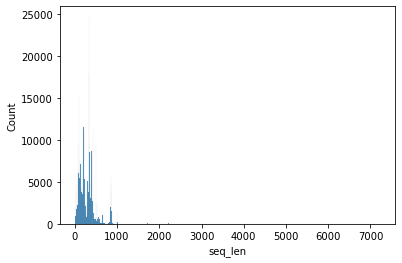

     start     end   count  percentage
0     11.0   611.5  343915   92.820302
1    611.5  1212.0   25516    6.886594
2   1212.0  1812.5     608    0.164095
3   1812.5  2413.0     335    0.090414
4   2413.0  3013.5      97    0.026180
5   3013.5  3614.0      14    0.003779
6   3614.0  4214.5      16    0.004318
7   4214.5  4815.0      10    0.002699
8   4815.0  5415.5       0    0.000000
9   5415.5  6016.0       0    0.000000
10  6016.0  6616.5       0    0.000000
11  6616.5  7217.0       6    0.001619


In [27]:
print_seq_len_histogram(df, n_bins=12)